# Исследование развлекательного приложения Procrastinate Pro+.

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

**Цель исследования:**
+ Определить окупается ли реклама приложения в целом.
+ Выявить причины неэффективной маркетинговой политики. 
+ Сформулировать рекомендации для отдела рекламы.

**Ход исследования**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
+ лог сервера с данными об их посещениях,
+ выгрузка их покупок за этот период,
+ рекламные расходы.

Предстоит исследовать:
+ Предобработка данных;
+ Задам функции для расчета и анализа;
+ Определю откуда приходят пользователи и какими устройствами они пользуются;
+ Сколько стоит привлечение пользователей из различных рекламных каналов;
+ Сколько денег приносит каждый клиент;
+ Когда расходы на привлечение клиента окупаются;
+ Какие факторы мешают привлечению клиентов.

### Загрузим данные и подготовим их к анализу

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta

In [2]:
# прочтем файл и создадим датафрейм
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
# посмотрим первые 5 строк
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [5]:
# посмотрим информацию о датафрейме
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [6]:
# посмотрим уникальные регионы
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [7]:
# посмотрим с каких устройст заходят пользователи
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [8]:
# посмотрим каналы
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [9]:
# приведем столбцы к типу дата
visits['session_start'] = pd.to_datetime(visits['session_start']) 
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [10]:
# проверим наличие полных дубликатов
visits.duplicated().sum()

0

In [11]:
# проверим наличие пропусков
visits.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [12]:
# посмотрим начало сессии 
visits['session_start'].min()

Timestamp('2019-05-01 00:00:41')

In [13]:
# посмотрим день завершения сессии
visits['session_end'].max()

Timestamp('2019-11-01 01:38:46')

In [14]:
# посмотрим первые 5 строк
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [15]:
orders.columns = orders.columns.str.lower().str.replace(' ', '_')

In [16]:
# посмотрим информацию о датафрейме
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [17]:
# приведем столбец к типу дата
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [18]:
# проверим наличие пропусков
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [19]:
# проверим наличие полных дубликатов
orders.duplicated().sum()

0

In [20]:
# уникальные значения в столбце revenue
orders['revenue'].unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

In [21]:
# посмотрим первые 5 строк
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [22]:
# приведем столбцы к нижнему регистру
costs.columns = costs.columns.str.lower()

In [23]:
# посмотрим информацию о датафрейме
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [24]:
# проверим наличие пропусков
costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [25]:
# проверим наличие полных дубликатов
costs.duplicated().sum()

0

In [26]:
# приведем столбец к типу дата
costs['dt'] = pd.to_datetime(costs['dt'])

In [27]:
# уникальные значения в столбце costs
costs['costs'].unique()

array([113.3  ,  78.1  ,  85.8  , 136.4  , 122.1  , 118.8  , 101.2  ,
       100.1  ,  93.5  , 104.5  , 132.   , 105.6  ,  92.4  , 110.   ,
       117.7  , 128.7  ,  99.   ,  88.   , 115.5  ,  97.9  ,  82.5  ,
       140.8  ,  91.3  , 107.8  , 169.4  , 178.2  , 213.4  , 214.5  ,
       234.3  , 159.5  , 147.4  , 138.6  , 143.   , 193.6  , 135.3  ,
       163.9  , 124.3  , 114.4  , 176.   , 210.1  , 158.4  , 144.1  ,
       171.6  , 174.9  , 258.5  , 232.1  , 237.6  , 217.8  , 227.7  ,
       235.4  , 255.2  , 264.   , 242.   , 233.2  , 204.6  , 240.9  ,
       194.7  , 179.3  , 168.3  , 156.2  , 134.2  , 182.6  , 160.6  ,
       123.2  ,  90.2  , 108.9  , 145.2  , 189.2  , 141.9  , 133.1  ,
       206.8  , 198.   , 167.2  , 161.7  , 218.9  , 261.8  , 216.7  ,
       229.9  , 155.1  , 188.1  , 205.7  , 192.5  , 152.9  , 228.8  ,
       225.5  , 203.5  , 191.4  , 211.2  , 207.9  , 221.1  , 183.7  ,
       148.5  , 170.5  , 195.8  , 173.8  , 248.6  , 299.2  , 236.5  ,
       243.1  , 294.

**Вывод:** 

Были проверены датафреймы, дубликатов и пропусков не нашла. Переименовала столбцы, приведя их к нижнему регистру и заменив пробел на нижнее подчеркивание. Заменила тип столбцов даты и времени на datetime.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.


Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [28]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [29]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [30]:
def get_ltv(
    profiles,  # Шаг 1. Получить профили и данные о покупках
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # Шаг 2. Добавить данные о покупках в профили

    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и выручку
        purchases[['user_id', 'event_dt', 'revenue']],
        on='user_id',
        how='left',
    )

    # Шаг 3. Рассчитать лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):

        # Шаг 3. Построить таблицу выручки
        # строим «треугольную» таблицу
        result = df.pivot_table(
            index=dims,
            columns='lifetime',
            values='revenue',  # в ячейках — выручка за каждый лайфтайм
            aggfunc='sum',
        )

        # Шаг 4. Посчитать сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)

        # Шаг 5. Вычислить размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )

        # Шаг 6. Объединить размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        # Шаг 7. Посчитать LTV
        # делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [31]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [32]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [33]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [34]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [35]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [36]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

### Исследовательский анализ данных

####  Составим профили пользователей и определим минимальную и максимальную даты привлечения пользователей

In [37]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

In [38]:
# профили пользователей
profiles = get_profiles(visits, orders, costs)

In [39]:
# посмотрим первые 5 строк
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [40]:
# проверим даты на соответствие с ТЗ
min_date = profiles['dt'].min()
max_date = profiles['dt'].max() 
min_date, max_date

(Timestamp('2019-05-01 00:00:00'), Timestamp('2019-10-27 00:00:00'))

*Комментарий* Даты корректны. Минимальная дата привлечения пользователей - 2019-05-01. Максимальная дата привлечения пользователей - 2019-10-27.

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [41]:
# сгруппируем данные по региону и количеству пользователей
profiles_reg = profiles.groupby('region').agg({'user_id': 'count'})
profiles_reg.columns = ['user_count']

In [42]:
# создадим столбец плательщика по региону
profiles_reg['payer_reg'] = profiles.query('payer == True').groupby('region')['user_id'].count()

In [43]:
# найдем долю платящих пользователей
profiles_reg['share'] = (profiles_reg['payer_reg'] / profiles_reg['user_count'])* 100

In [44]:
# отсортируем 
profiles_reg.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,user_count,payer_reg,share
region,,,
United States,100002,6902,6.9%
Germany,14981,616,4.1%
UK,17575,700,4.0%
France,17450,663,3.8%


*Комментарий* Основные платящие пользователи из США, Германии, Великобритании, Франции. На США приходиться больше платящих пользователей.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [45]:
# сгруппируем данные по устройству и найдем количество пользователей
profiles_device = profiles.groupby('device').agg({'user_id': 'count'})
profiles_device.columns = ['user_count']

In [46]:
# найдем платящих пользователей
profiles_device['payer_d'] = profiles.query('payer == True').groupby('device')['user_id'].count()

In [47]:
# найдем долю платящих пользователей по устройству
profiles_device['share'] = (profiles_device['payer_d'] / profiles_device['user_count'])* 100

In [48]:
# отсортируем
profiles_device.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,user_count,payer_d,share
device,,,
Mac,30042,1912,6.4%
iPhone,54479,3382,6.2%
Android,35032,2050,5.9%
PC,30455,1537,5.0%


*Комментарий* Пользователи пользуются Mac, iPhone, Android, PC. Большая доля платящих пользователей приходиться на Mac(6,4%), iPhone(6,2%).

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [49]:
# сгруппируем данныепо каналам
profiles_channel = profiles.groupby('channel').agg({'user_id': 'count'})
profiles_channel.columns = ['user_count']

In [50]:
# найдем количество платящих пользователей
profiles_channel['payer_cl'] = profiles.query('payer == True').groupby('channel')['user_id'].count()

In [51]:
# определим долю платящих пользователей
profiles_channel['share'] = (profiles_channel['payer_cl'] / profiles_channel['user_count'])* 100

In [52]:
# отсортируем
profiles_channel.sort_values(by='share', ascending=False).style.format({'share': '{:.1f}%'})

,user_count,payer_cl,share
channel,,,
FaceBoom,29144,3557,12.2%
AdNonSense,3880,440,11.3%
lambdaMediaAds,2149,225,10.5%
TipTop,19561,1878,9.6%
RocketSuperAds,4448,352,7.9%
WahooNetBanner,8553,453,5.3%
YRabbit,4312,165,3.8%
MediaTornado,4364,156,3.6%
LeapBob,8553,262,3.1%


*Комментарий* Больше всего платящих пользоватеей пришло FaceBoom(12,2%), AdNonSense(11,3%), lambdaMediaAds(10,5%), TipTop(9,6%) и RocketSuperAds(7,9%).

**Вывод:** 
+ Минимальная дата привлечения пользователей - 2019-05-01. 
+ Максимальная дата привлечения пользователей - 2019-10-27.
+ Пользователи приходят в приложение из США, Германии, Великобритании, Франции.
+ Платящих пользователей больше в США.
+ Пользователи используют устройства Mac, iPhone, Android, PC. 
+ Большая доля платящих пользователей приходиться на Mac(6,4%), iPhone(6,2%), т.е. мы можем сказать, что в целом пользователи Apple имеют лучшую конверсию покупателей. Возможно, тут есть плюсы ApplePay.
+ Каналы привлечения пользователей: FaceBoom, AdNonSense, lambdaMediaAds, TipTop, RocketSuperAds, WahooNetBanner, YRabbit, MediaTornado, LeapBob, OppleCreativeMedia, organic.
+ Больше всего платящих пользоватеей пришло FaceBoom(12,2%), AdNonSense(11,3%), lambdaMediaAds(10,5%), TipTop(9,6%) и RocketSuperAds(7,9%).


### Маркетинг

####  Посчитаем общую сумму расходов на маркетинг

In [53]:
# посчитаем общую сумму расходов на маркетинг
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [54]:
# сгруппируем расходы по каналам
costs_group = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

In [55]:
# найдем общую сумму расходов
costs_group['costs'].sum().round()

105497.0

In [56]:
# посмотрим распределение трат по рекламным источникам
costs_group

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


*Комментарий* 

Общая сумма расходов на маркетинг - 105497

На маркетинг больше всего было потрачено на каналы TipTop и FaceBoom. 

#### Построим визуализацию динамики изменения расходов во времени

In [57]:
# визуализирую динамику изменения расходов во времени (по неделям и месяцам) по каналам.
costs['week'] = pd.to_datetime(costs['dt']).dt.week
costs['month'] = pd.to_datetime(costs['dt']).dt.month

C:\Users\Regina\AppData\Local\Temp\ipykernel_22232\1063199433.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  costs['week'] = pd.to_datetime(costs['dt']).dt.week


In [58]:
costs

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,43,10
1796,2019-10-24,lambdaMediaAds,6.4,43,10
1797,2019-10-25,lambdaMediaAds,8.8,43,10
1798,2019-10-26,lambdaMediaAds,8.8,43,10


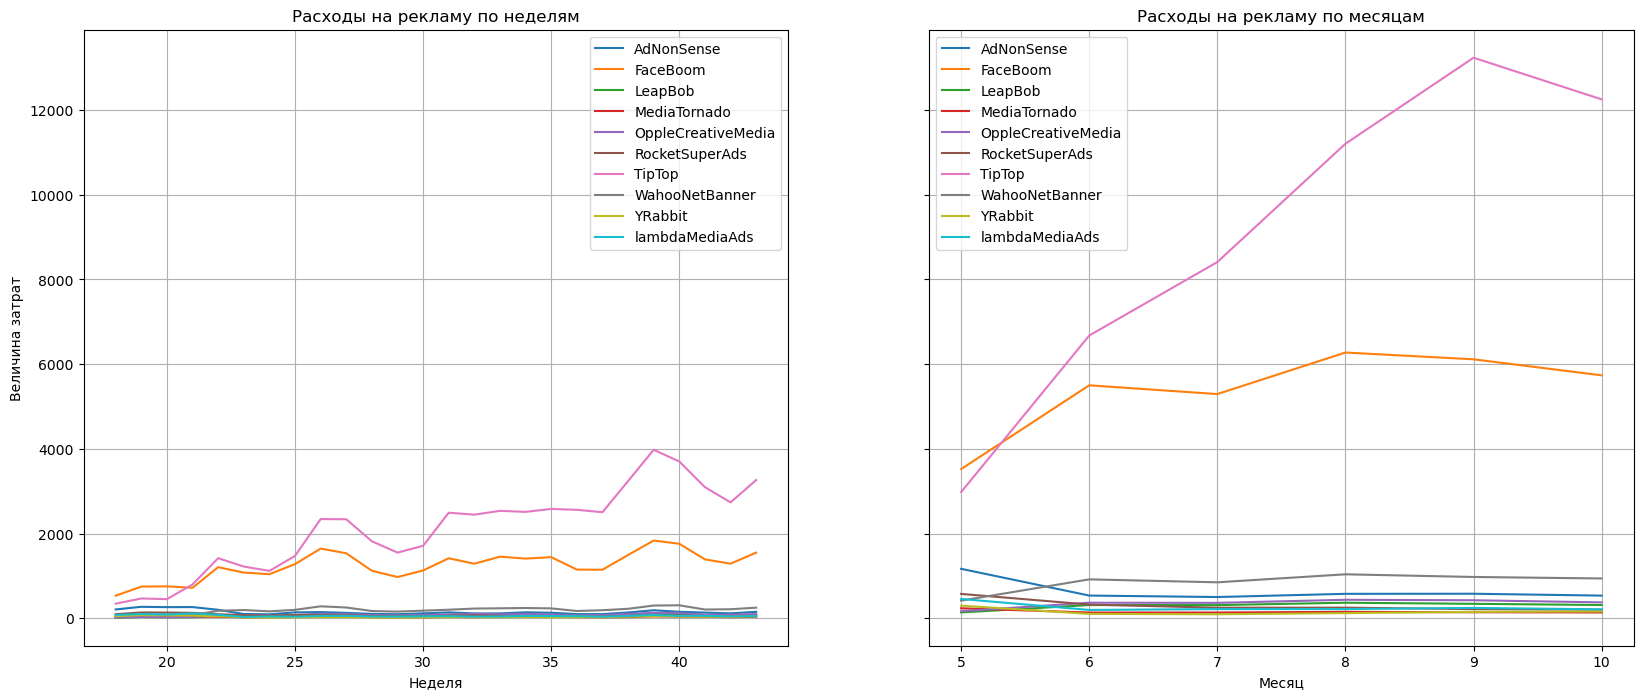

In [59]:
# построим график распределения расходов на рекламу повремени
plt.figure(figsize=(20, 8))
ax1 = plt.subplot(1, 2, 1)

costs_week = costs.pivot_table(index = 'week', columns = 'channel', values = 'costs', aggfunc = 'sum')\
.plot(grid=True, title='Расходы на рекламу по неделям', ax=ax1)
plt.legend()
plt.xlabel('Неделя')
plt.ylabel('Величина затрат')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
costs_month = costs.pivot_table(index = 'month', columns = 'channel', values = 'costs', aggfunc = 'sum')\
.plot(grid=True, title='Расходы на рекламу по месяцам', ax=ax2)
plt.legend()
plt.xlabel('Месяц')
plt.ylabel('Величина затрат')
plt.show()

*Комментарий* На каналы TipTop и FaceBoom тратиться больше маркетинговых средств, что отображают графики расходов на рекламу по неделям и месяцам. 

#### Узнаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

In [60]:
# узнаем сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника
profiles = get_profiles(visits, orders, costs)

In [61]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-07 20:58:57,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-09 12:46:07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01 09:58:33,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-22 21:35:48,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-02 00:07:44,False,0.230769


In [62]:
cac_channel = pd.DataFrame()

In [63]:
# отфильтруем органических пользователей
profiles = profiles.query('channel != "organic"')

In [64]:
# найдем затраты для каждого канала
cac_channel['acquisition_cost'] = profiles.groupby('channel')['acquisition_cost'].mean()

In [65]:
cac_channel.sort_values(by = 'acquisition_cost', ascending=False).round(2)

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [66]:
# средний САС 
profiles['acquisition_cost'].mean().round(2)

1.13

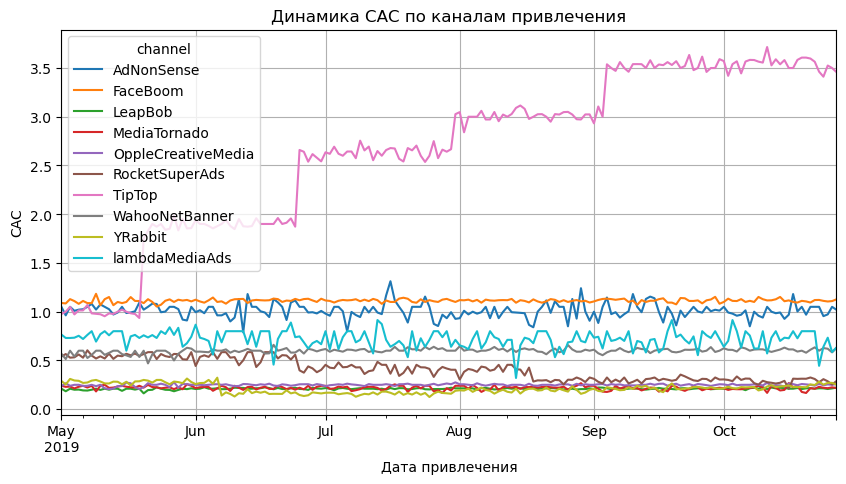

In [67]:
# построим график динамики изменения САС по каналам
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean').plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

*Комментарий* Самые дорогие каналы привлечения пользователя TipTop(2.80), FaceBoom(1.11), AdNonSense(1.01). Однако количество и доля платящих пользователей TipTop, не так высоки. Это можно объяснить молодой аудиторией TipTop'a и, соответственно, не очень высокой их платежеспособностью. Средний САС по проекту 1.13

**Вывод:**
    
+ Общая сумма расходов на маркетинг - 105497.
+ На каналы TipTop и FaceBoom тратиться больше маркетинговых средств.
+ Самые дорогие каналы привлечения пользователя TipTop(2.80), FaceBoom(1.11), AdNonSense(1.01). 
+ Средний САС по проекту 1.13

### Оцените окупаемость рекламы

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

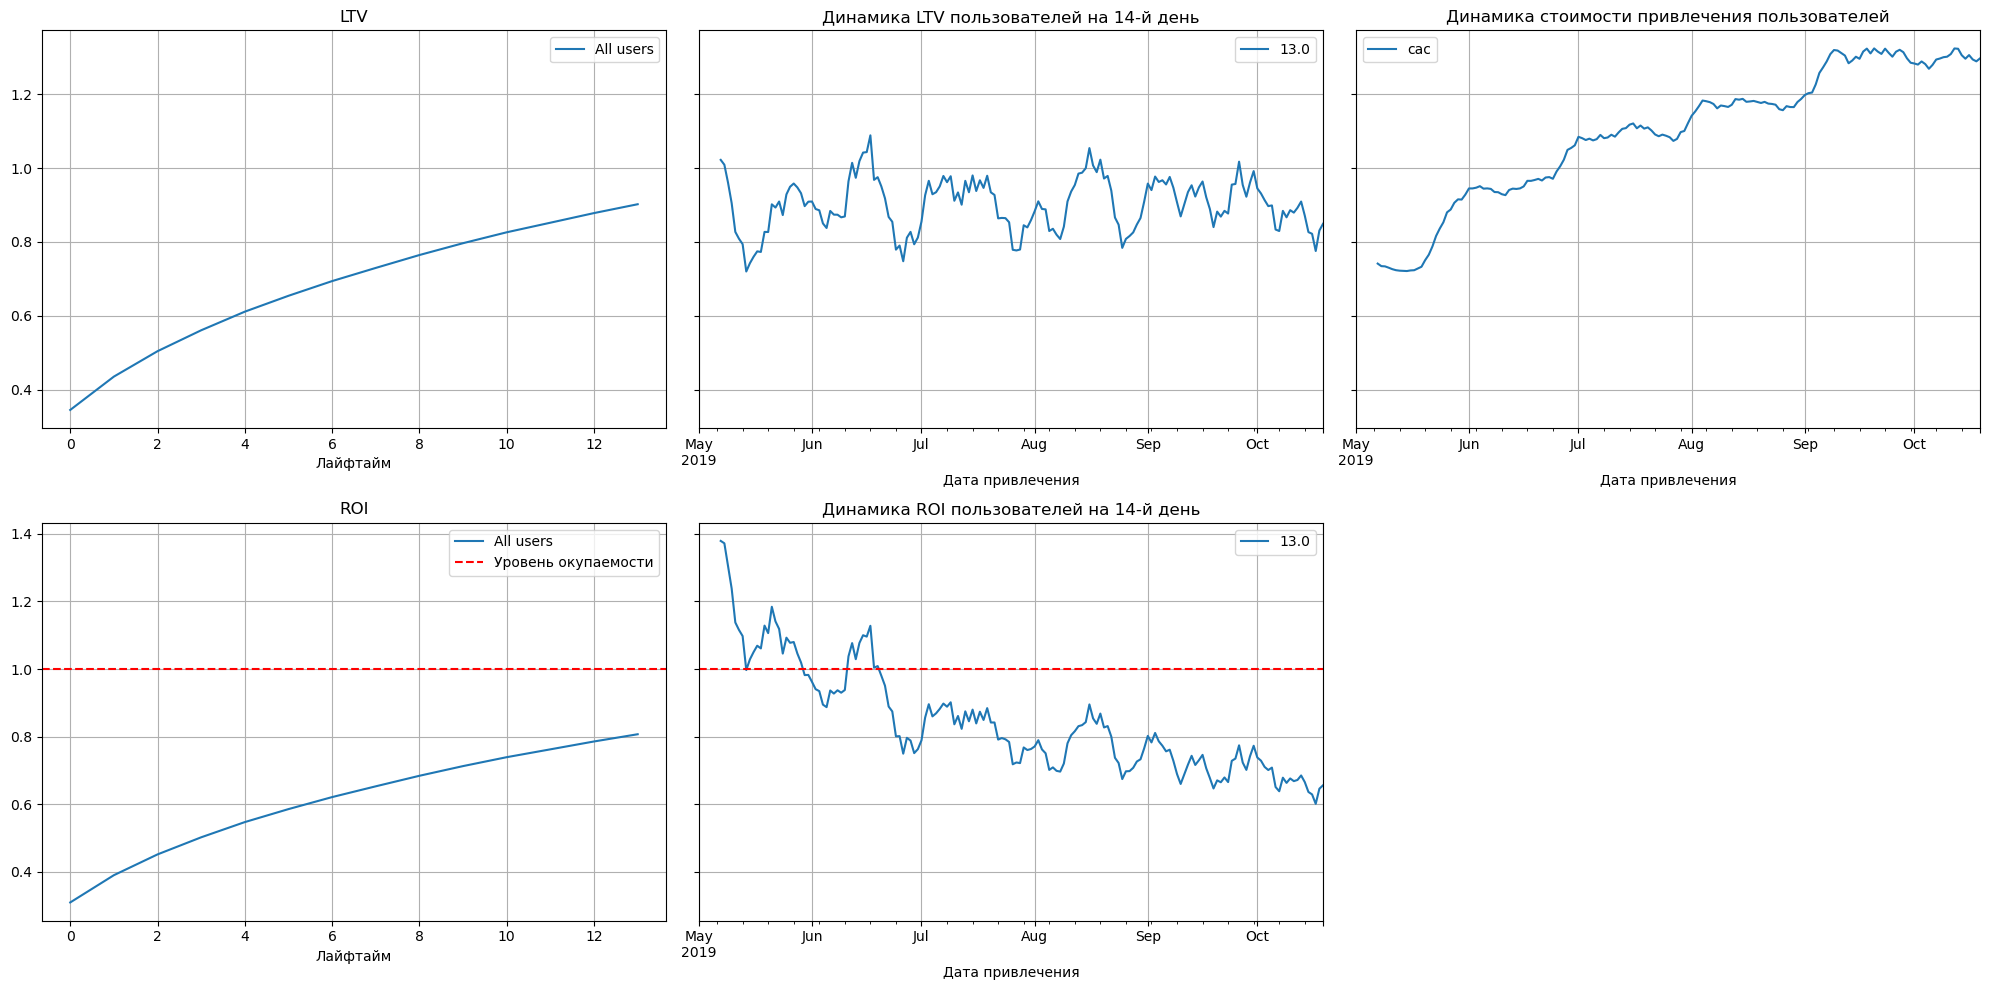

In [68]:
# проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

*Комментарий* LTV стабильно держится на одном уровне. САС растет. По ROI видим, что окупаемость только на 80%. По динамике - окупаемость была с мая по середину июня.

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

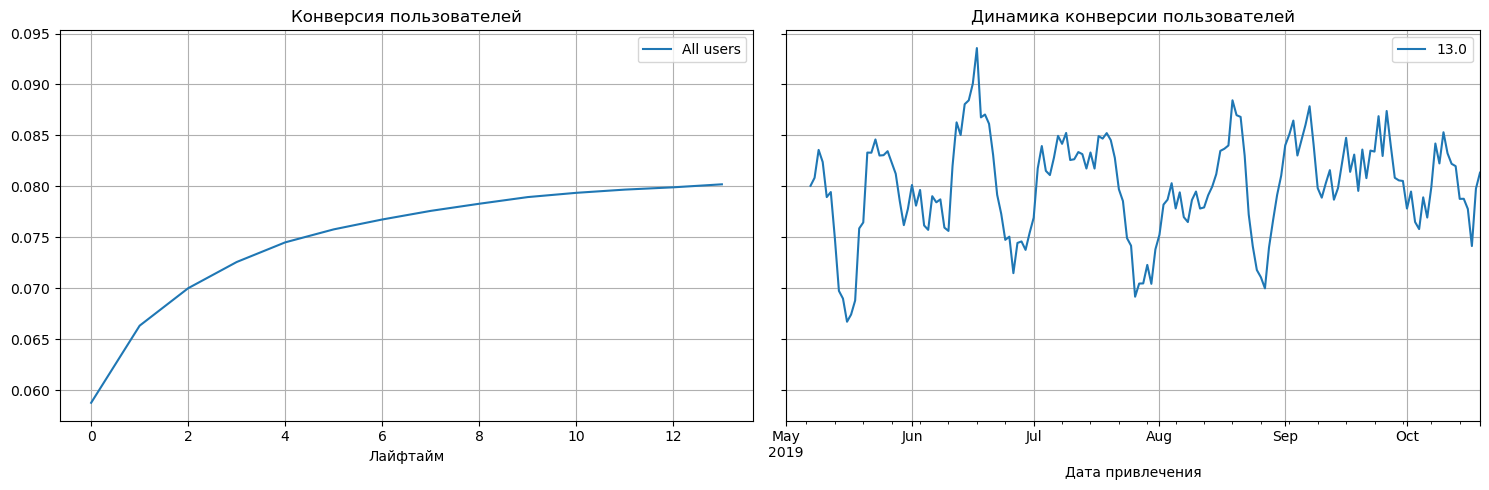

In [69]:
# проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей
# построим и изучим графики конверсии и удержания.
# смотрим конверсию пользователей

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days,
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Комментарий* В целом конверсия пользователей постепенно увеличивается.

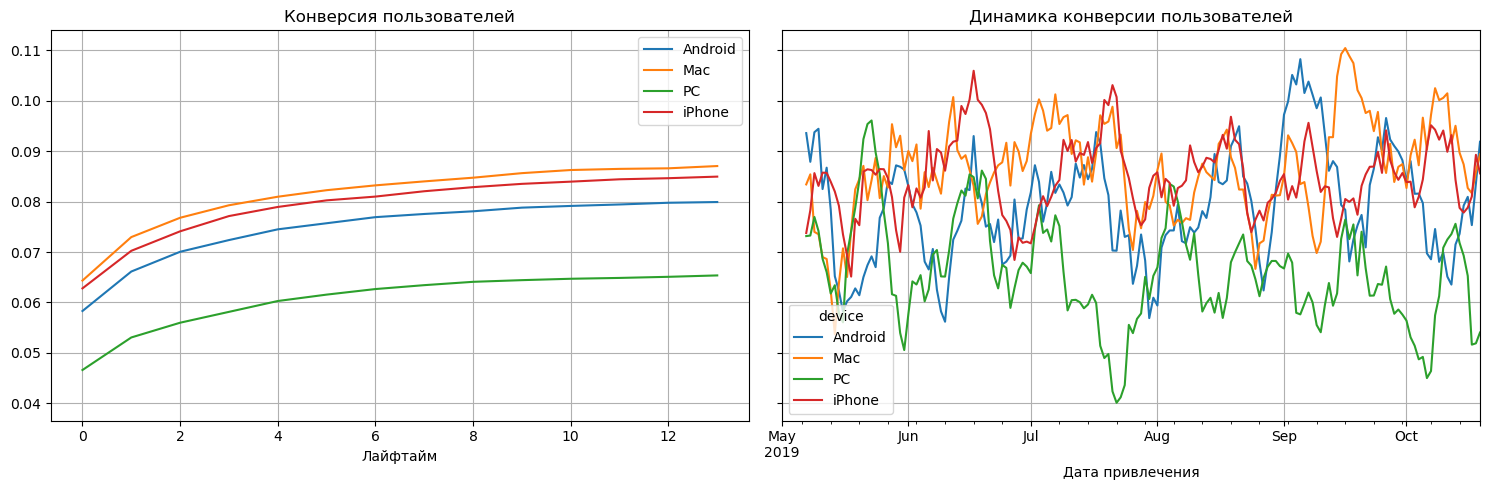

In [70]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Комментарий* Стабильное увеличение конверсии у Mac, iPhone, Android. 

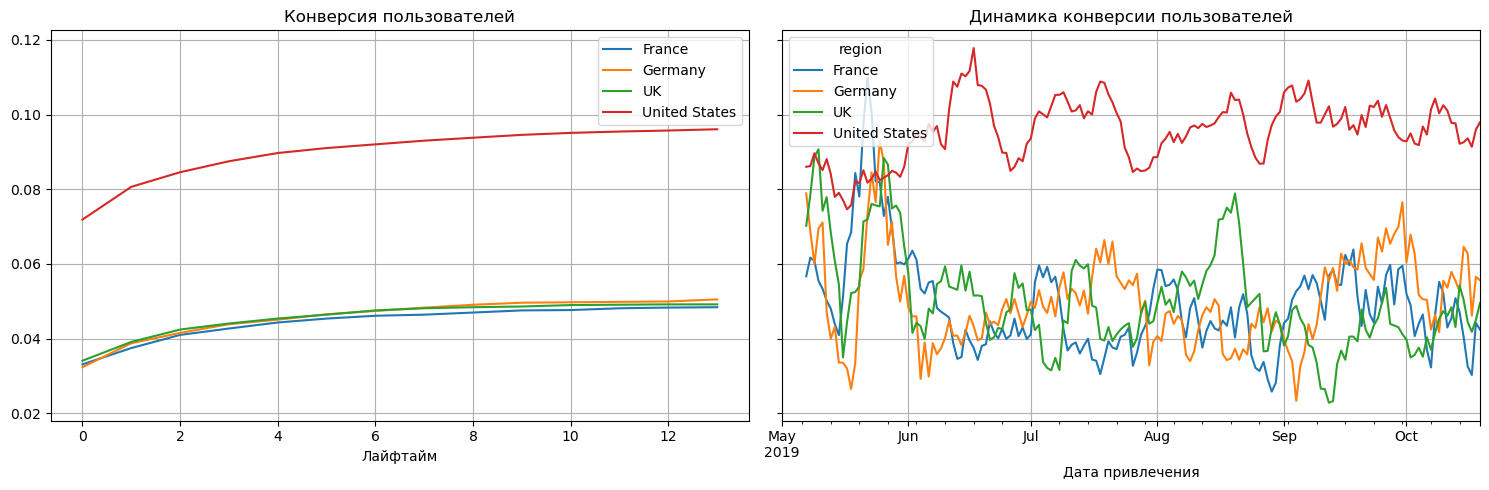

In [71]:
# смотрим конверсию с разбивкой по регионам

dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Комментарий* Динамика конверсии в США лучше, чем в остальных странах.

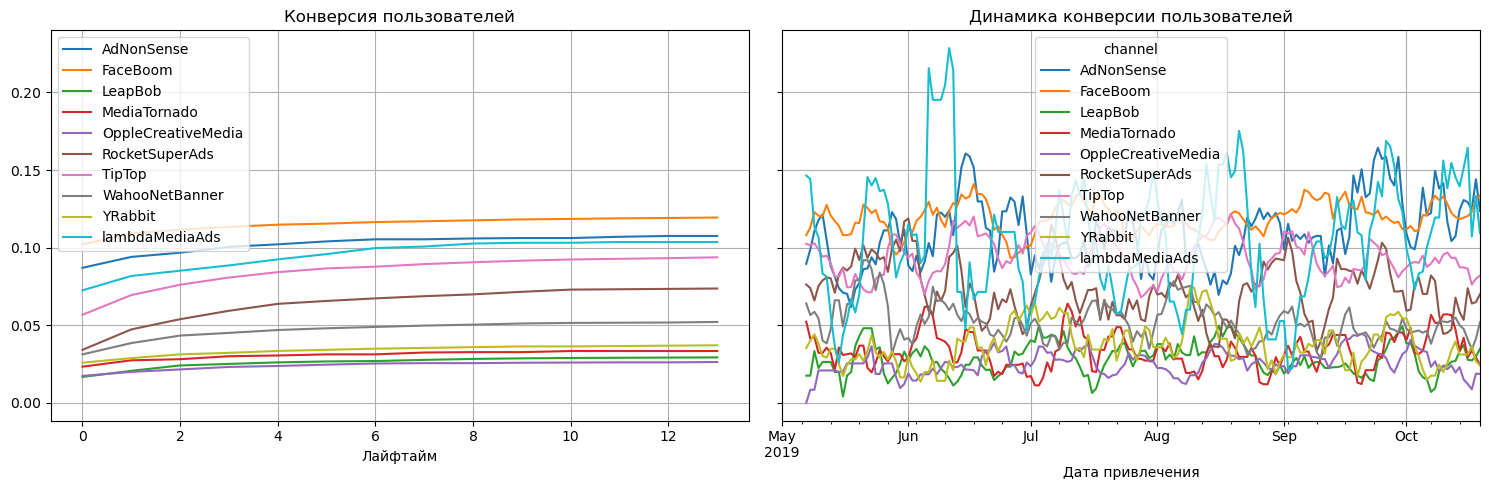

In [72]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

*Комментарий* Динамика конверсии пользователей лучше - FaceBoom, AdNonSense, lambdaMediaAds, TipTop.

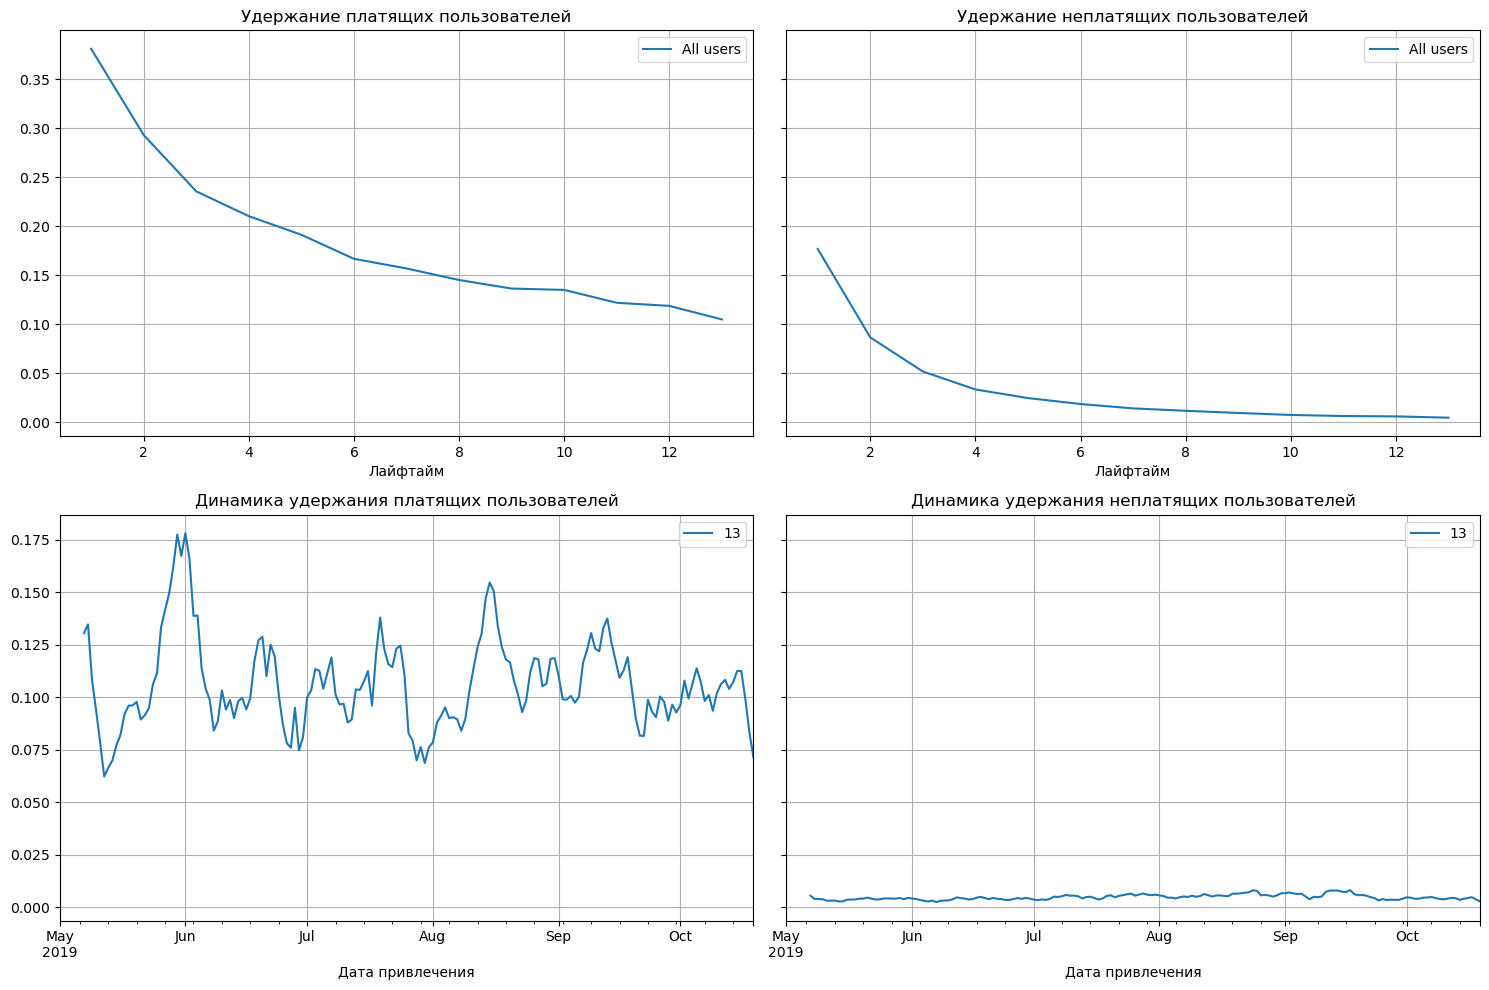

In [73]:
# смотрим удержание пользователей

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

*Комментарий* Динамика удержания платных пользователей идет на снижение.

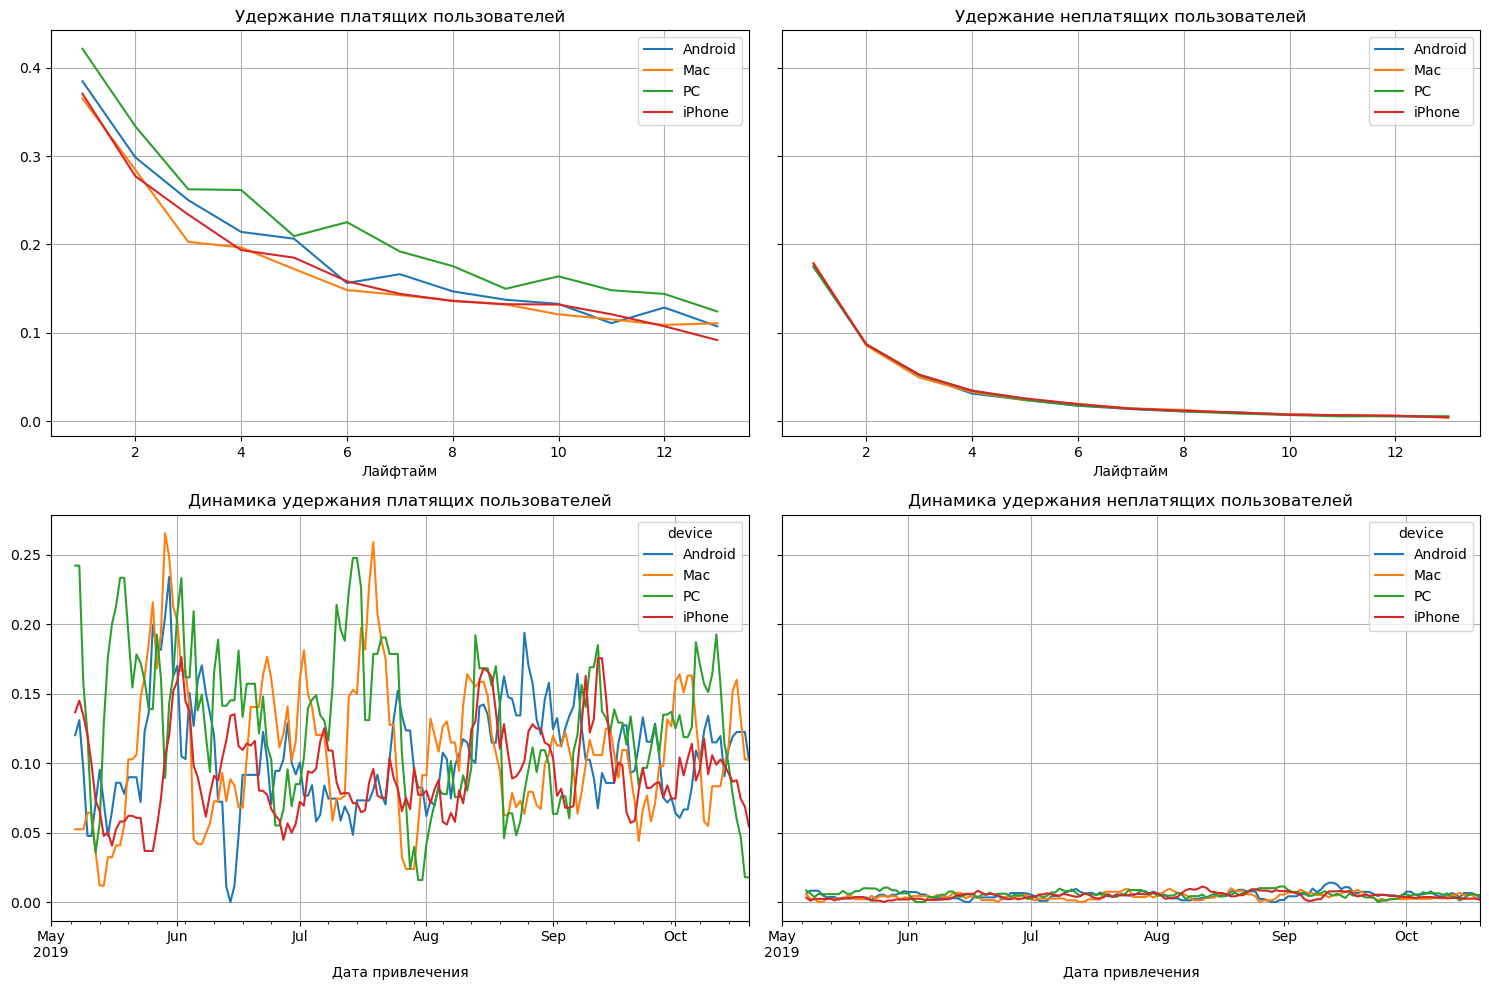

In [74]:
# смотрим удержание с разбивкой по устройствам

dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

*Комментарий* В динамике удержания показатели у Android и Mac лучше.

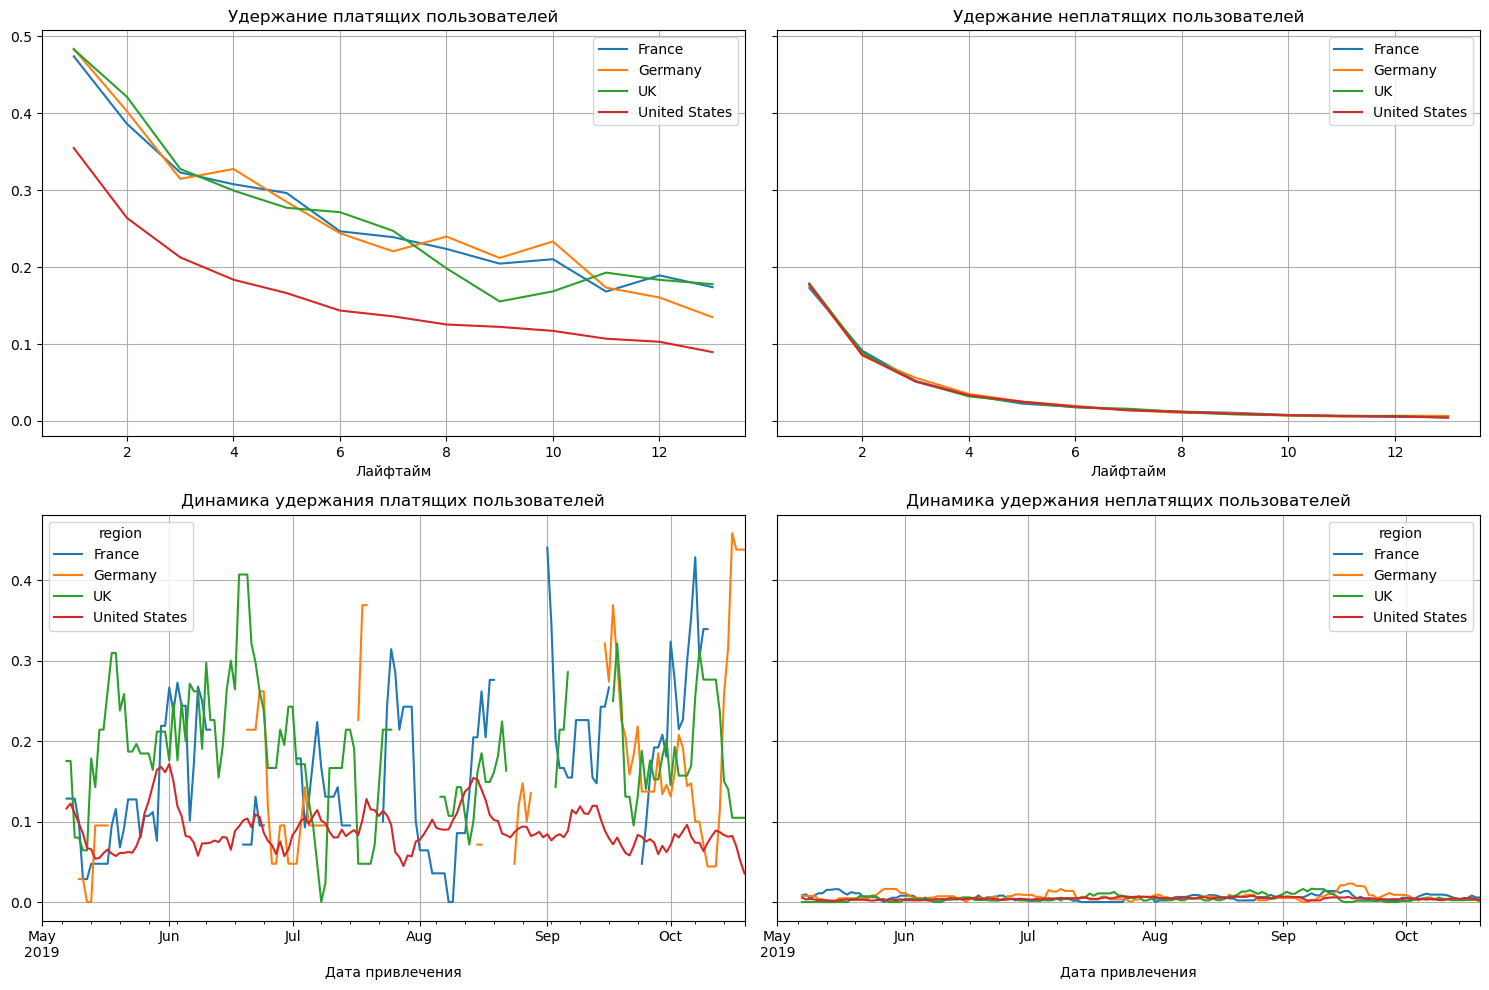

In [75]:
# смотрим удержание с разбивкой по регионам

dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

*Комментарий* Германия и Франция по динамике удержания пользователей имеют лучшие показатели. Самый нижкий в США.

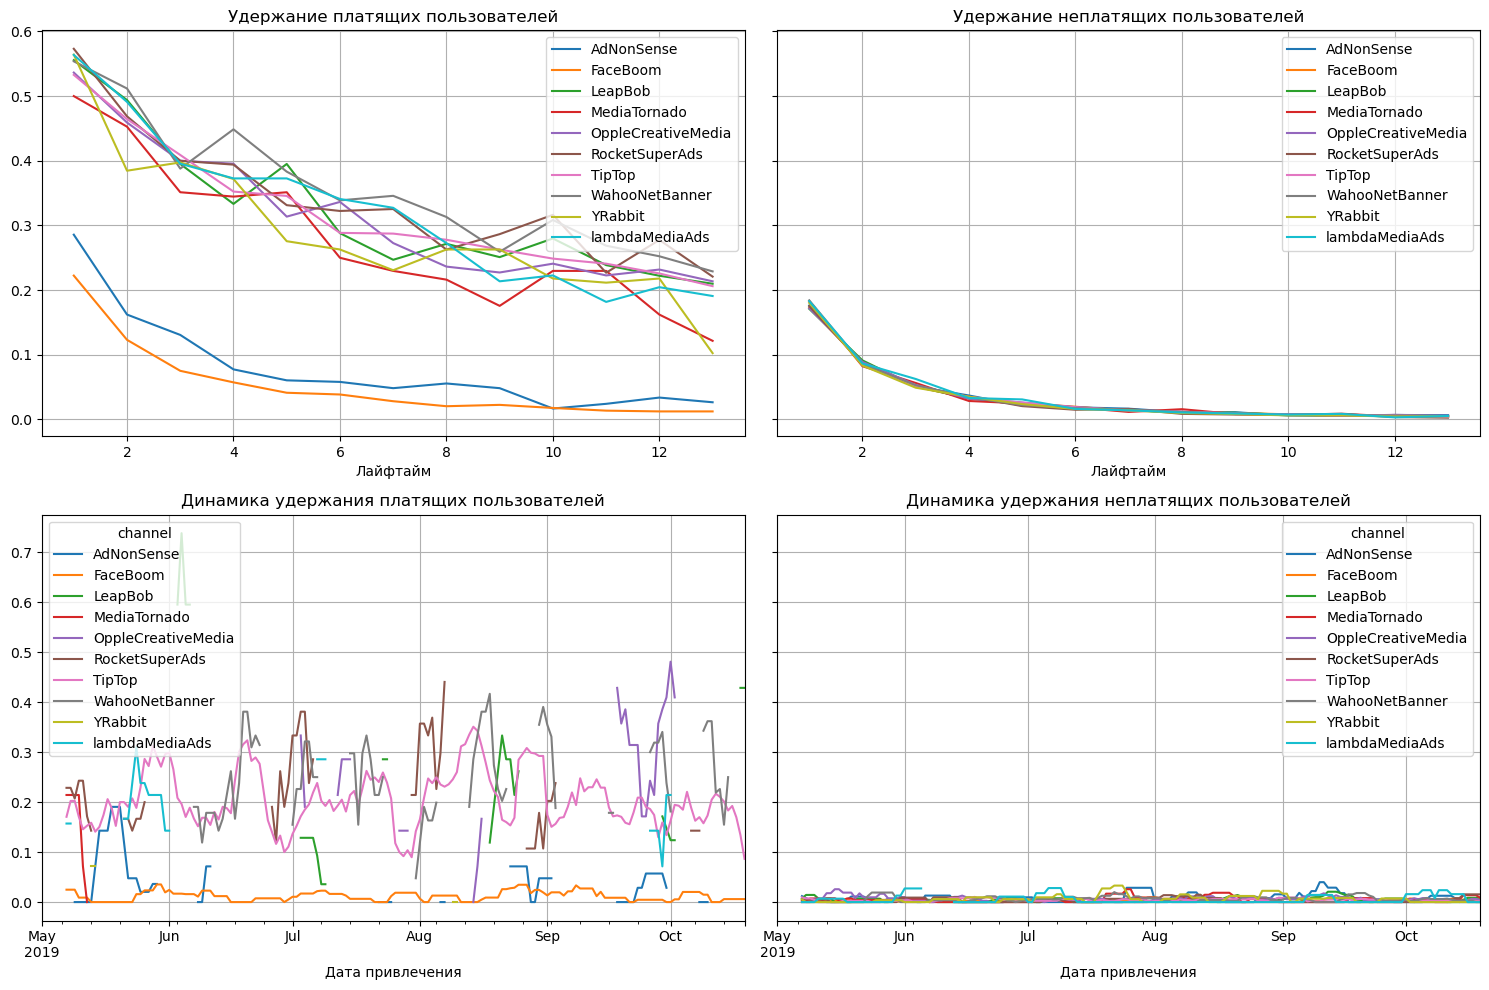

In [76]:
# смотрим удержание с разбивкой по каналам

dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

*Комментарий* FaceBoom, AdNonSense самые низкие показатели по удержанию пользователей. TipTop имеет стабильную динамику.

*Вывод*

Конверсия ползователей стбильная, пользователи MAC конвертируются очень хорошо. Удержание платящих пользователей плохое, стабильно снижается до 10%. Конверсия по каналам, слабо увеличивается. По динамике конверсия лучше у FaceBoom, AdNonSense, lambdaMediaAds. Ударжание платных пользователей  в каналах FaceBoom, AdNonSense ниже чем у других. Конверсия в США хорошая. Динамика удержания платных пользователей США самая низкая. 

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

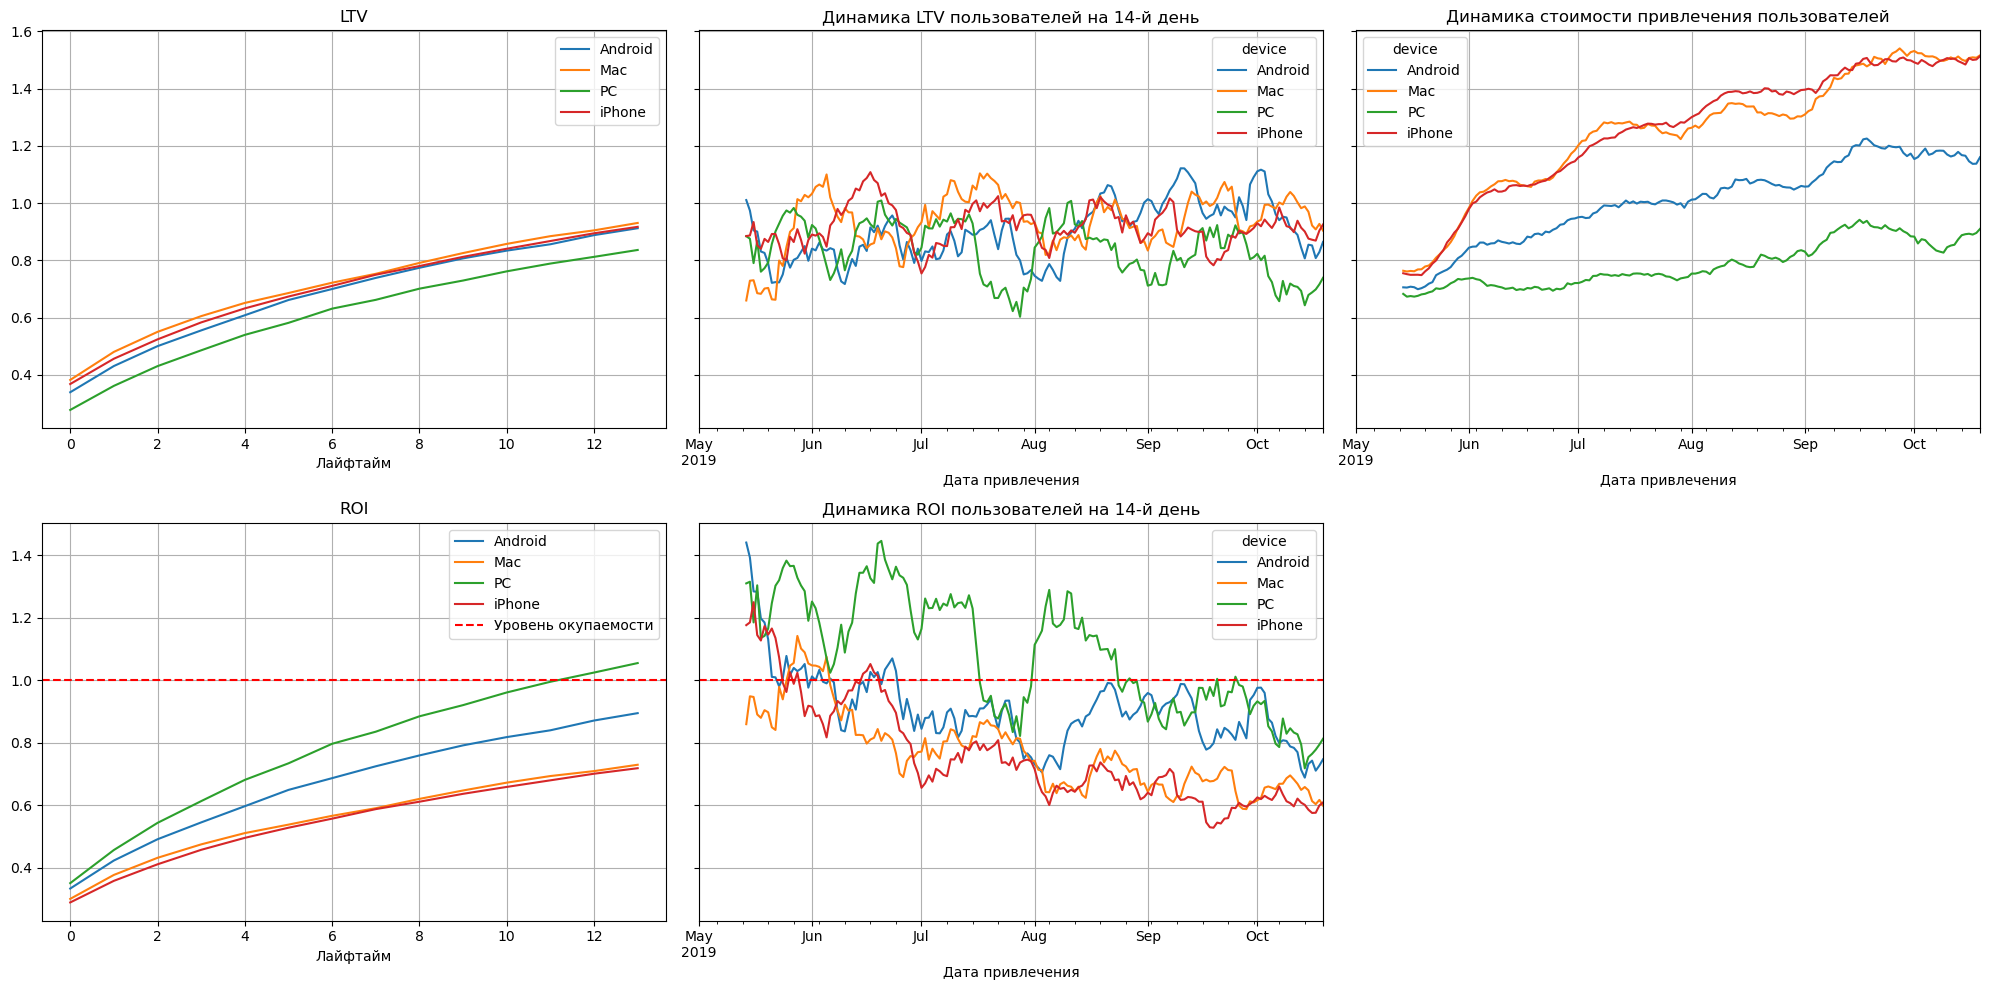

In [77]:
# проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

*Комментарий* LTV стабилен. Динамика стоимости привлечения пользователя растет, самая высокая у Mac и iPhone. При этом реклама окупается только у PC, чья стоимость привлечения ниже других усройств. 

####  Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

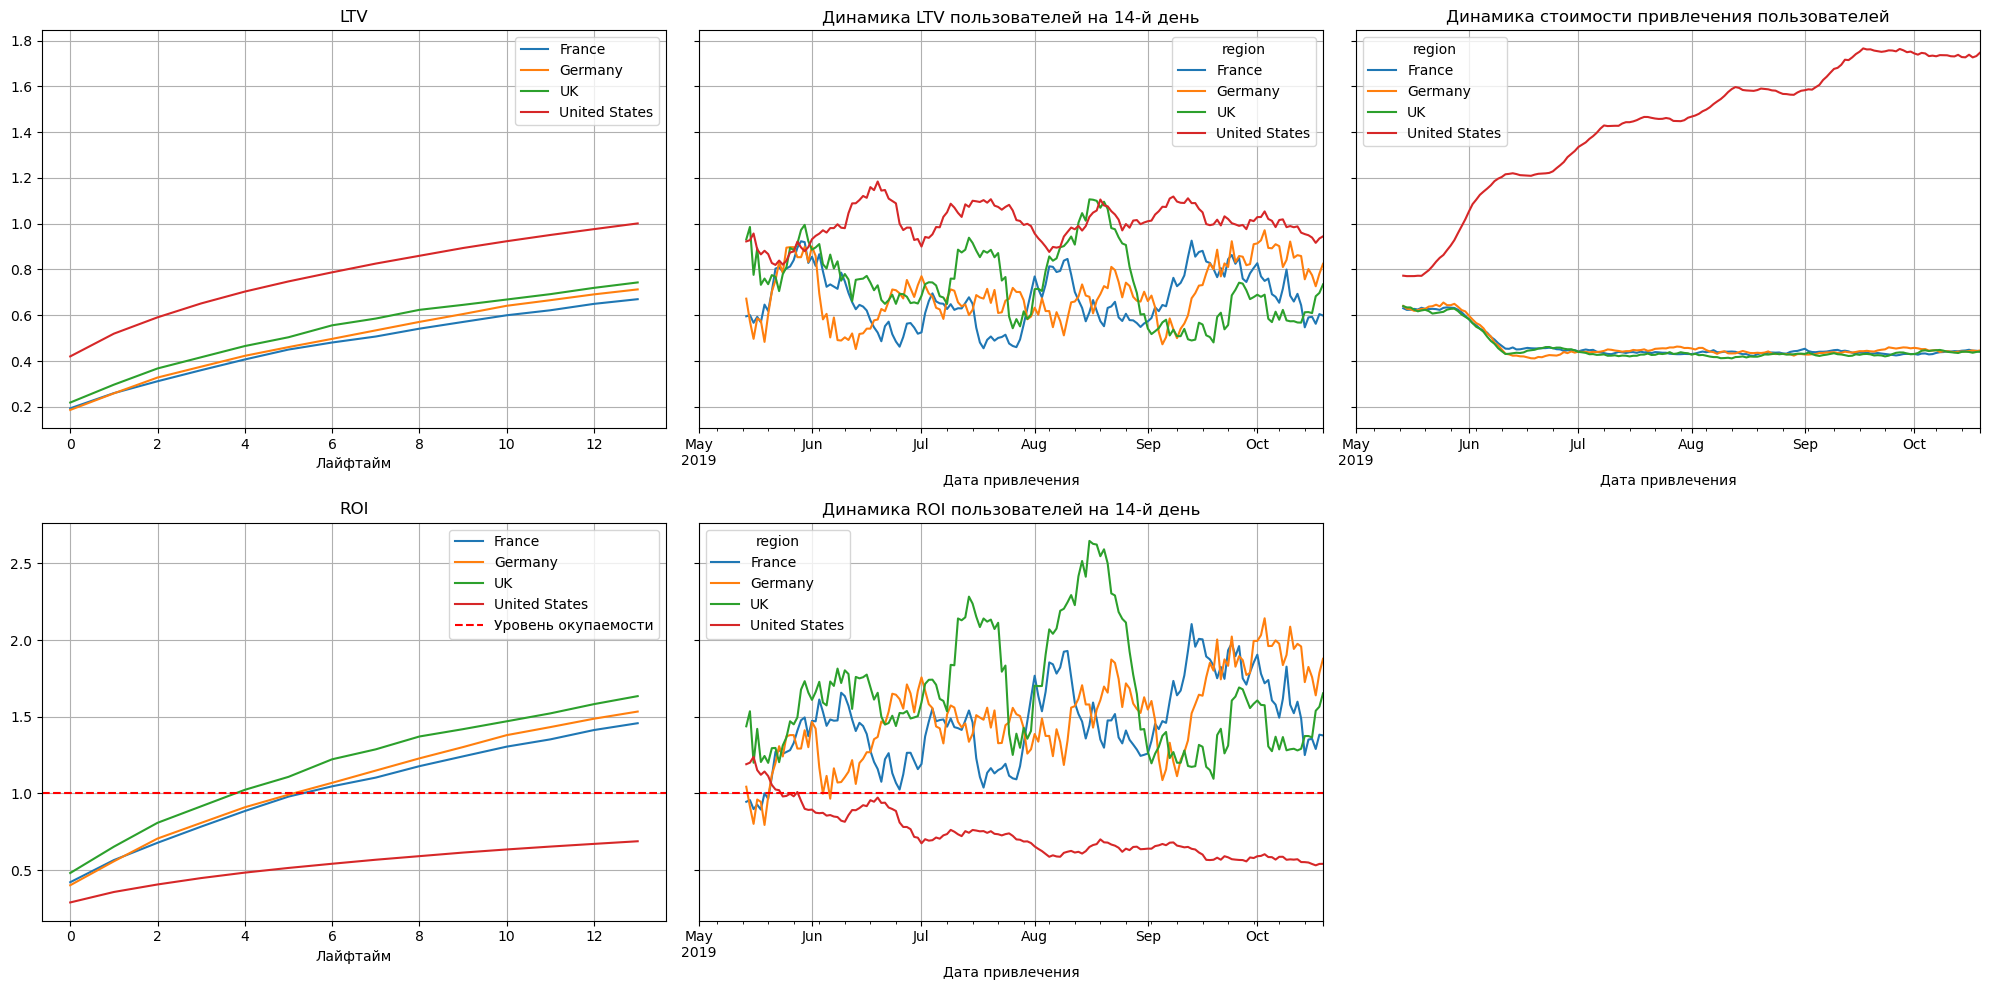

In [78]:
# проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

*Комментарий* LTV стабилен, самый высокий в США, при этом только ROI США не окупается. 

####  Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

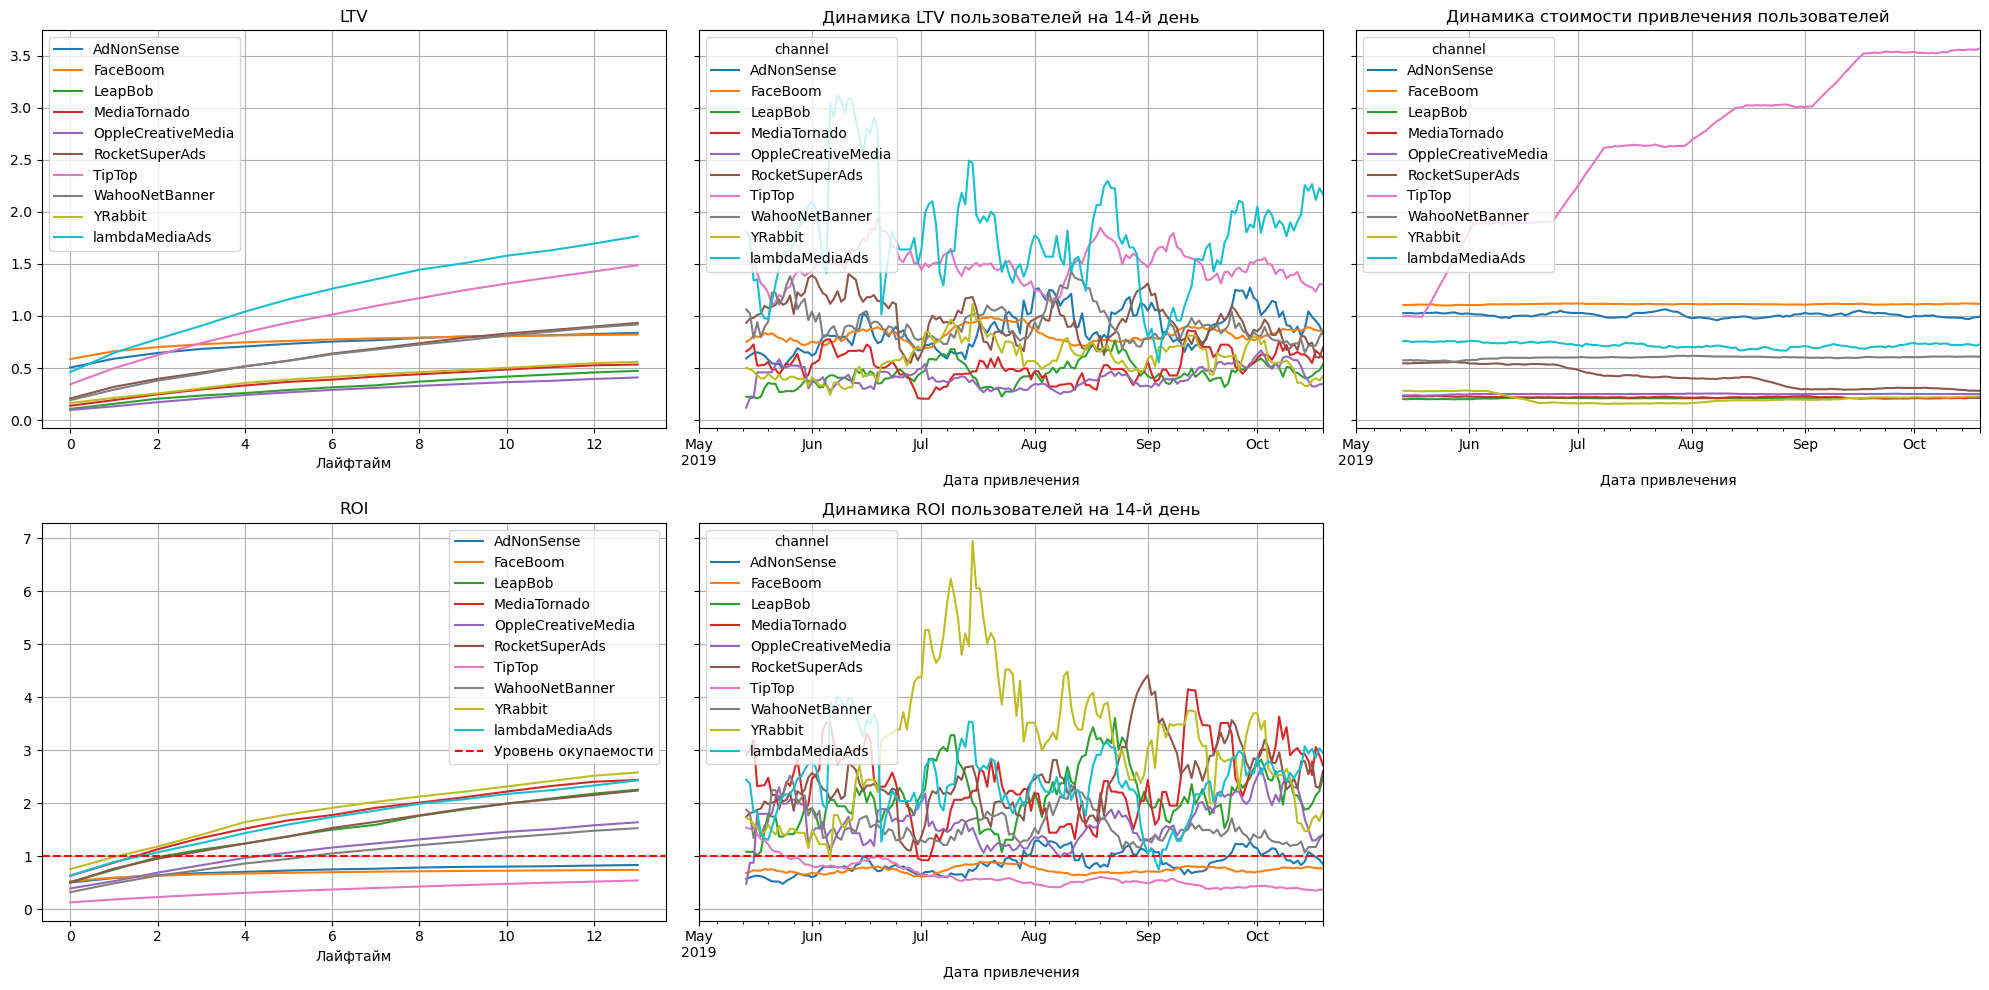

In [79]:
# проанализируем окупаемость рекламы с разбивкой по рекламным каналам
# построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

*Комментарий* LTV по странам разнится, по динамике lambdaMediaAds и TipTop лидируют. При этом ROI AdNonSense, TipTop и FaceBoom не окупается. САС канала TipTop в разы завышен по сравнению с остальными каналами. С середины мая рекламный бюджет для этого канала планомерно увеличивали.

#### Ответим на такие вопросы:


1. Окупается ли реклама, направленная на привлечение пользователей в целом?
2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
3. Чем могут быть вызваны проблемы окупаемости?

---

1. Реклама в целом не окупается.
2. Из устройств Mac и iPhone могут оказывать негативное влияние на ROI. Страна которая не окупает рекламу и на которую приходится больше затрат CAC - США. Самый дорогой канал TipTop, который не окупает затраты на рекламу, так же негативно влияют на окупаемость AdNonSense и FaceBoom.
3. Проблемы окупаемости могут быть вызваны не верным распределение рекламных средств по каналам. 



**Вывод по окупаемости рекламы, возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела:**
    
CAC TipTop превышает окупаемост ROI, необходимо рассмотреть другой канал для рекламы. Можно проверить соотносятся ли пользователи пришедшие из США и TipTop. Выявить в чем причина низкого удержания пользователей из США. Так же стоит обратить внимание откуда пришли пользователи использующие PC, удержание на этом устройстве выше остальных. 

### Выводы

#### Выделим причины неэффективности привлечения пользователей.

+ Каналы AdNonSense, TipTop и FaceBoom не окупаемые по затратам на рекламу, САС этих каналов самые дорогие. Необоснованно высокий САС для канала TipTop. 

+ Удержание платных пользователей США самое низкое, при этом LTE пользователей растет, конверсия пользователей хорошая. 

+ ROI Mac и iPhone не окупается, удержание платящих пользователей у iPhone ниже, конверсия и LTE хорошие, вероятно есть техническая проблема для устройств на IOS в нашем приложении Procrastinate Pro+.


#### Сформулируем рекомендации для отдела маркетинга.

+ Конверсия у Mac и iPhone высокая, необходимо решить проблему с удержанием пользователей.
+ Динамика конверсии в США самая высокая, основной поток пользователей из этой страны, если решить проблему удержания, то затраты ROI могут окупиться. 
+ Снизить САС для канала TipTop.
+ Понять причину плохого удержания FaceBoom, AdNonSense, при хорошей конверсии. 